## Adults dataset :


In [358]:
import pandas as pd
import numpy as np
data= pd.read_csv("adult.csv")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [360]:
# replacing missing values "?" with nan values
data=data.replace("?",np.nan)

In [361]:
# converting target variable to (0,1) values for salary <=50K & 
data["income"]=data["income"].replace("<=50K",0)
data["income"]=data["income"].replace(">50K",1)


In [362]:
data["income"].unique()

array([0, 1], dtype=int64)

In [363]:
# treating the nan values
data["workclass"]=data["workclass"].fillna(method="bfill")
data["occupation"]=data["occupation"].fillna(method="bfill")
data["native.country"]=data["native.country"].fillna(method="bfill")


In [364]:
data["fnlwgt"].isnull().sum()/len(data["fnlwgt"])

0.0

In [365]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [332]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,1


In [144]:
dummies_data = pd.get_dummies(data,columns=["workclass","education","marital.status","occupation","relationship","race","sex","native.country"],drop_first=True)

In [145]:
dummies_data

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,9,0,4356,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,66,10,0,4356,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,9,0,3770,45,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,38,6,0,3770,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,74,16,0,3683,20,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,68,9,0,3683,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,41,10,0,3004,60,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Selection using SelectKBest method :

In [228]:
IV = dummies_data.drop("income",axis=1)
DV = dummies_data["income"]

In [229]:
from sklearn.feature_selection import SelectKBest ,chi2

In [230]:
best= SelectKBest(score_func=chi2,k=10)

In [231]:
FIT=best.fit(IV,DV)

In [232]:
df_fit=pd.DataFrame(FIT.scores_)
df_cols=pd.DataFrame(IV.columns)

In [233]:
feature_df = pd.concat([df_cols,df_fit],axis=1)
feature_df.columns= ["Features","Score"]

In [234]:
xy=feature_df[["Features","Score"]].sort_values(by="Score",ascending=False).head(10)
xy

,Features,Score
2,capital.gain,8.219247e+07
3,capital.loss,1.372146e+06
0,age,8.600612e+03
4,hours.per.week,6.476409e+03
28,marital.status_Married-civ-spouse,3.477516e+03
1,education.num,2.401422e+03
30,marital.status_Never-married,2.218522e+03
48,relationship_Own-child,1.435873e+03
35,occupation_Exec-managerial,1.178920e+03
23,education_Masters,9.397752e+02


# Replacing fnlwgt with its mean of output variable :

In [367]:
data1 = data.pivot_table(index="fnlwgt",values="income",aggfunc=np.mean)
data1
abc=pd.Series(data1["income"],index=data1.index)

In [369]:
abc

fnlwgt
12285      0.000000
13769      0.000000
14878      1.000000
18827      0.000000
19214      0.000000
19302      0.600000
19395      0.000000
19410      0.000000
19491      0.000000
19520      0.000000
19700      1.000000
19752      0.000000
19793      0.000000
19847      0.000000
19899      1.000000
19914      0.250000
20057      0.000000
20098      0.000000
20101      0.000000
20109      0.000000
20179      1.000000
20296      1.000000
20308      0.000000
20323      0.000000
20333      1.000000
20438      0.000000
20469      0.000000
20507      1.000000
20511      0.000000
20534      0.333333
             ...   
791084     0.000000
795830     0.000000
799281     0.000000
806316     0.000000
806552     1.000000
809585     1.000000
816750     0.000000
849857     0.000000
857532     0.000000
860348     0.000000
889965     0.000000
910398     0.000000
913447     0.000000
917220     0.000000
930948     0.000000
953588     1.000000
972354     0.000000
981628     0.000000
1033222    0.

In [370]:
data["fnlwgt"]=data["fnlwgt"].map(abc)
data        

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,0.000000,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,0.000000,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,0.000000,Some-college,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,0.000000,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,0.000000,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,0.000000,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,0.000000,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,1.000000,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,0.000000,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,1.000000,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,1


## Fitting the GaussianNB model :

In [376]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data["workclass"]=le.fit_transform(data["workclass"])
data["occupation"]=le.fit_transform(data["occupation"])
data["education"]=le.fit_transform(data["education"])
data["marital.status"]=le.fit_transform(data["marital.status"])
data["capital.gain"]=le.fit_transform(data["capital.gain"])
data["capital.loss"]=le.fit_transform(data["capital.loss"])
data["hours.per.week"]=le.fit_transform(data["hours.per.week"])
data["relationship"]=le.fit_transform(data["relationship"])

In [377]:
IV_data= data[["age","fnlwgt","relationship","marital.status","capital.gain","hours.per.week","education.num"]]

In [378]:
DV_data=data["income"]

In [379]:
clf=GaussianNB()

In [380]:
trainx,testx,trainy,testy = train_test_split(IV_data,DV_data,test_size=0.2,random_state=0)

In [381]:
clf.fit(trainx,trainy)
y_pred=clf.predict(testx)
accuracy_score(testy,y_pred)

0.9184707508060801

In [383]:
confusion_matrix(testy,y_pred)

array([[4634,  332],
       [ 199, 1348]], dtype=int64)

## Feature selection using corr heatmap :

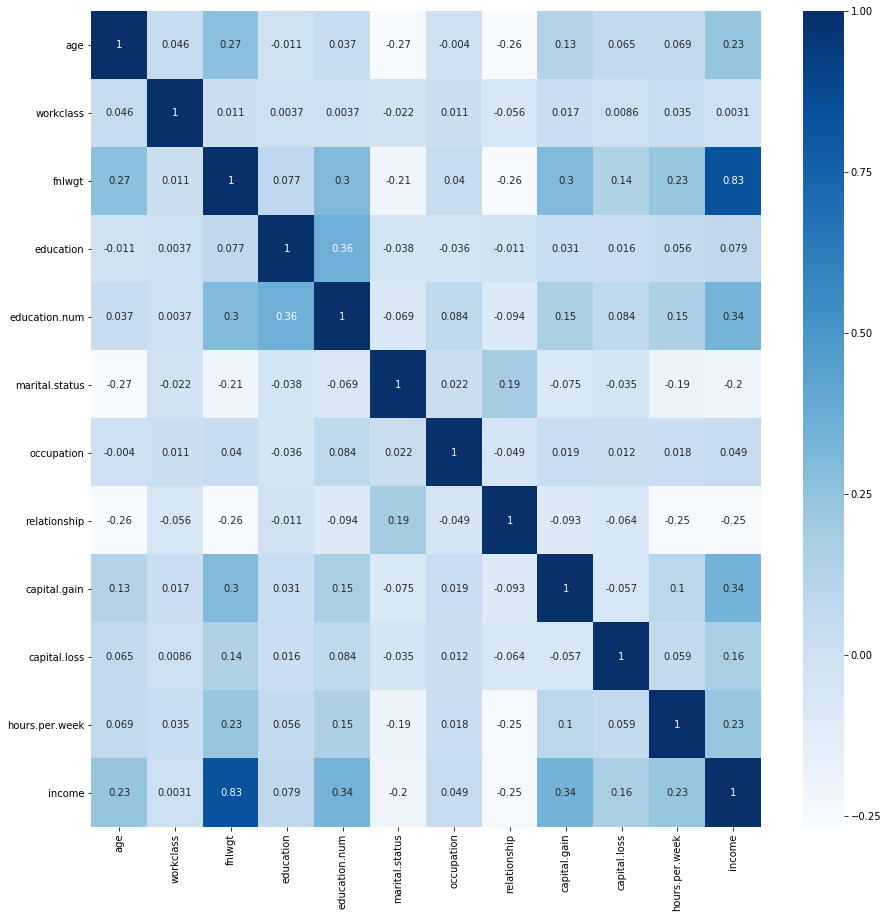

In [384]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="Blues")


In [ ]:
 clf1= BernoulliNB()

In [4]:
import autosklearn


ModuleNotFoundError: No module named 'autosklearn'